# Activity 03

In this activity, I utilized two sets of images: one containing around 400 bird pictures and the other around 400 drone pictures. In this section, I developed a machine learning model aimed at distinguishing between birds and drones.

In [62]:
# Import required libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix

In [40]:
# Access to the images in local disk

base_dir = r'A:\Project X\Software Eng\Esoft\Semester 03\UNIT_25 - Machine Learning\Assignment\ML Project\BirdVsDrone'

In [41]:
# Data augmentation and normalization

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Use 20% of the data for validation

In [42]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 250),
    batch_size=20,
    class_mode='binary',
    subset='training')  # Set as training data

Found 662 images belonging to 2 classes.


In [43]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 250),
    batch_size=20,
    class_mode='binary',
    subset='validation')  

Found 164 images belonging to 2 classes.


This code will automatically label images based on the folder names and split the data into training and validation sets. The images are resized to 150 * 250 pixels and batches are set to 20.

**Model Building**

In [44]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 250, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Train the Model**

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50) 

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 344ms/step - accuracy: 0.5295 - loss: 0.7233 - val_accuracy: 0.7439 - val_loss: 0.5896
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 343ms/step - accuracy: 0.5439 - loss: 0.6864 - val_accuracy: 0.7256 - val_loss: 0.6577
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 417ms/step - accuracy: 0.6175 - loss: 0.6826 - val_accuracy: 0.7744 - val_loss: 0.6172
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 451ms/step - accuracy: 0.5961 - loss: 0.6917 - val_accuracy: 0.7561 - val_loss: 0.6532
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 340ms/step - accuracy: 0.6349 - loss: 0.6417 - val_accuracy: 0.7439 - val_loss: 0.5244
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 337ms/step - accuracy: 0.6609 - loss: 0.6044 - val_accuracy: 0.7866 - val_loss: 0.5040
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 423ms/step - accuracy: 0.7337 - loss: 0.5734 - val_accuracy: 0.8354 - val_loss: 0.4566
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 375ms/step - accuracy: 0.7233 - loss: 0

**Evaluate the Model**

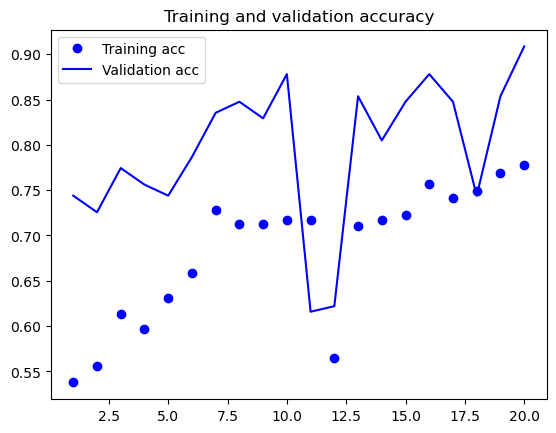

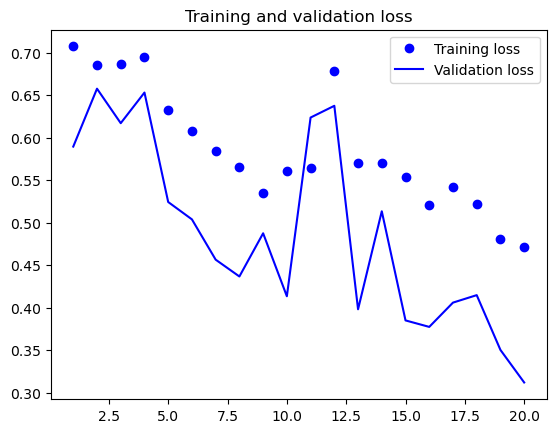

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Check the model validity with actual photos**

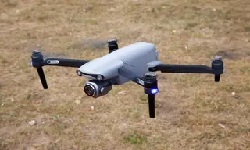

In [55]:
# Adding completely new drone image to test the model

img_path = r'A:\Project X\Software Eng\Esoft\Semester 03\UNIT_25 - Machine Learning\Assignment\ML Project\Test\Drones_111.webp'  
img = image.load_img(img_path, target_size=(150, 250))
img

In [56]:
# Convert image into an arrray

img_tensor = image.img_to_array(img)
img_tensor /= 255.0
img_tensor = np.expand_dims(img_tensor, axis=0) # Adding new dimension
print(img_tensor.shape) 

(1, 150, 250, 3)


In [57]:
# Since we have properly formatted the image now, we can use the model to predit the image

prediction = model.predict(img_tensor)

print(f'Probability that the image is a drone: {prediction[0][0]}')
print()
if prediction[0][0] > 0.5:
    print("👉 The image is more likely a drone.")
else:
    print(".👉 The image is more likely a bird.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Probability that the image is a drone: 0.8693515062332153

👉 The image is more likely a drone.


**Analysis of Model Effectiveness - Condusion Matrix**

In [58]:
predictions = model.predict(validation_generator)
predicted_classes = (predictions > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step


In [59]:
true_classes = validation_generator.classes

In [61]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

[[28 51]
 [35 50]]


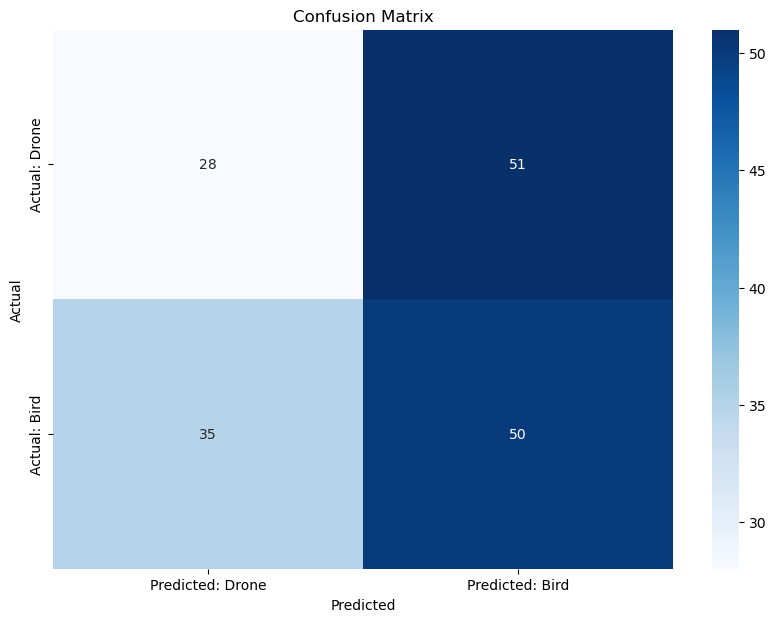

In [63]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted: Drone', 'Predicted: Bird'],
            yticklabels=['Actual: Drone', 'Actual: Bird'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()